**Inflation Forecasting: Wrangling Notebook**

This notebook was made to forecast inflation rate in Indonesia based on 2019-2024 data.

Version: January 2025
___

- Developed by [Hamam Wulan Ayu](https://www.linkedin.com/in/hwulanayu/) and [Irfan Chairur Rachman](https://www.linkedin.com/in/irfanchairurrachman/)

# Inflation Forecasting 

This notebook explores several machine learning (ML) methods to improve inflation forecasting in Indonesia. The goal is to forecast general price inflation, based on various macroeconomic factors that affect inflation rate <sup>[[1]](#reference)</sup>. The data was collected for 2019-2024.

This notebook uses Random Forest Regressor, Prophet time series, and Vanilla Neural Network methods to forecast inflation with the best performance is Vanilla Neural Network with 0.821 RMSE and 26.07% MAPE.

This project divided by two notebook:
1. **`1_Wrangling.ipynb`: Consist of loading, exploring, wrangling and cleaning data for machine learning input.**
2. `2_Modelling.ipynb`: Consist of preprocessing, modelling and evaluating processes.

# Load and Data Cleaning

The data used in this notebook available on Bank Indonesia and Badan Pusat Statistik (BPS) websites. The data was collected for 2019-2024 with monthly range. Predictors are historical data of inflation with 3 lags, first lag represents inflation value previous month, second lag represents value from two months earlier, and third lag represents from three months earlier. This notebook also use external factors, the following factors are:

- IHK (*Indeks Harga Konsumen*)
- BI rate (*tingkat suku bunga*)
- Money supply (*jumlah uang beredar*)
- Rupiah-to-dollar exhange rate
- IHSG
- Credit value

This first notebook focus on how to loading from various data raw, cleaning and wrangling the dataset.

First, we need to load the library

In [46]:
# library loading
import pandas as pd
import matplotlib.pyplot as plt
import statistics

## IHK (*Indeks Harga Konsumen*)

In [47]:
df_ihk = pd.read_excel("data/Data Set_IHK.xlsx")
df_ihk = df_ihk.drop(columns=['Unnamed: 0'])
df_ihk.rename(columns={"Unnamed: 1": "Kategori"}, inplace=True)
df_ihk.head(5)

,Kategori,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00
0,"MAKANAN, MINUMAN DAN TEMBAKAU",98.596157,96.941335,98.999389,100.106767,100.656137,103.827596,106.014975,102.929201,101.704806,100.997956,99.682493,101.095748,103.040979,102.611964,102.383409,102.113287,102.743471,103.694184,104.253307,103.301976,103.926264,105.470924,106.931461,107.291030,109.963589,110.384416,112.071306,111.117090,112.015500,111.385949,108.205097,107.760279,106.99,106.98
1,MAKANAN,98.587730,96.363922,98.907142,100.189929,100.813392,104.730047,107.480691,103.501904,101.682532,100.692935,98.940988,100.414235,102.543024,101.887999,101.579691,100.860427,101.302486,102.317495,102.856813,101.613350,102.322483,103.999856,105.826361,106.231847,109.486185,109.976648,111.935319,110.556964,111.434980,110.561858,106.527569,105.875069,104.81,104.73
2,MINUMAN YANG TIDAK BERALKOHOL,98.975214,99.447839,99.324648,99.756361,99.626433,99.867140,99.915058,100.093091,102.873141,103.147038,103.167376,103.284021,105.721707,106.256479,106.492871,107.937785,108.681458,109.802987,110.342838,110.544055,111.470398,111.497558,110.913315,110.900245,110.592395,110.592395,111.814954,112.109992,114.508782,116.264381,116.298816,116.950280,118.17,118.80
3,ROKOK DAN TEMBAKAU,100.059575,100.427451,100.815219,101.253479,101.637593,102.121075,102.303386,102.423250,102.804147,103.112702,103.431835,104.832232,105.710278,106.033290,106.059008,108.079881,109.820723,110.369239,111.292141,111.384438,111.528130,112.311573,112.631193,112.871107,112.885385,113.014153,113.081034,114.441183,114.863917,114.883790,116.073919,116.564869,116.91,117.15
4,PAKAIAN DAN ALAS KAKI,100.790187,100.784551,100.534680,100.965806,100.965738,100.959981,101.053368,101.053368,101.094087,101.094096,101.094096,101.094436,101.111997,101.112056,101.114042,101.340099,101.708887,101.818969,102.612304,102.612262,102.611764,102.871516,102.888957,102.889488,103.021287,103.235103,103.560077,105.302338,104.767617,104.758872,105.002839,104.989173,105.22,105.23


In [48]:
df_ihk_long = df_ihk.melt(id_vars=["Kategori"], var_name="Tanggal", value_name="Nilai")
df_ihk_long.head()

,Kategori,Tanggal,Nilai
0,"MAKANAN, MINUMAN DAN TEMBAKAU",2022-01-01 00:00:00,98.596157
1,MAKANAN,2022-01-01 00:00:00,98.587730
2,MINUMAN YANG TIDAK BERALKOHOL,2022-01-01 00:00:00,98.975214
3,ROKOK DAN TEMBAKAU,2022-01-01 00:00:00,100.059575
4,PAKAIAN DAN ALAS KAKI,2022-01-01 00:00:00,100.790187


In [49]:
df_ihk_long["Tanggal"] = pd.to_datetime(df_ihk_long["Tanggal"])

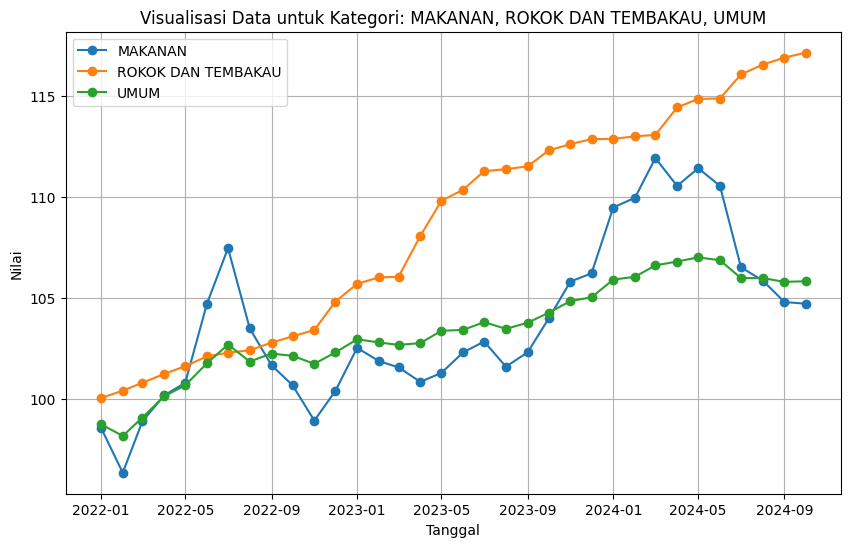

In [50]:
kategori_pilihan = ["MAKANAN", "ROKOK DAN TEMBAKAU", "UMUM"]

# Filter data berdasarkan kategori yang dipilih
df_filtered = df_ihk_long[df_ihk_long["Kategori"].isin(kategori_pilihan)]

# Membuat plot
plt.figure(figsize=(10, 6))
for kategori in kategori_pilihan:
    # Filter data untuk setiap kategori
    df_kategori = df_filtered[df_filtered["Kategori"] == kategori]
    # Plot data
    plt.plot(
        df_kategori["Tanggal"], 
        df_kategori["Nilai"], 
        marker="o", 
        label=kategori
    )

# Menambahkan label dan judul
plt.xlabel("Tanggal")
plt.ylabel("Nilai")
plt.title(f"Visualisasi Data untuk Kategori: {', '.join(kategori_pilihan)}")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [51]:
df_ihk_long['Kategori'].value_counts()

Kategori
MAKANAN, MINUMAN DAN TEMBAKAU                                     34
PENDIDIKAN                                                        34
INFORMASI, KOMUNIKASI, DAN JASA KEUANGAN                          34
PERALATAN INFORMASI DAN KOMUNIKASI                                34
LAYANAN INFORMASI DAN KOMUNIKASI                                  34
ASURANSI                                                          34
JASA KEUANGAN                                                     34
REKREASI, OLAHRAGA, DAN BUDAYA                                    34
BARANG REKREASI LAINNYA DAN OLAHRAGA                              34
LAYANAN REKREASI DAN OLAHRAGA                                     34
LAYANAN KEBUDAYAAN                                                34
KORAN, BUKU, DAN PERLENGKAPAN SEKOLAH                             34
PENDIDIKAN DASAR DAN ANAK USIA DINI                               34
JASA ANGKUTAN PENUMPANG                                           34
PENDIDIKAN MENENGAH      

In [52]:
df_ihk_long.nunique()

Kategori      51
Tanggal       34
Nilai       1114
dtype: int64

In [53]:
print("min:", df_ihk_long.Tanggal.min())
print("max:", df_ihk_long.Tanggal.max())

min: 2022-01-01 00:00:00
max: 2024-10-01 00:00:00


In [54]:
df_ihk_umum = df_ihk_long[df_ihk_long['Kategori'] == 'UMUM'].drop(columns='Kategori').reset_index(drop=True)
df_ihk_umum

,Tanggal,Nilai
0,2022-01-01,98.764046
1,2022-02-01,98.182595
2,2022-03-01,99.095886
3,2022-04-01,100.146773
4,2022-05-01,100.691232
5,2022-06-01,101.779788
6,2022-07-01,102.705528
7,2022-08-01,101.866893
8,2022-09-01,102.261580
9,2022-10-01,102.148024


In [55]:
df_ihk2019 = pd.read_excel("data/Indeks Harga Konsumen dan Inflasi Bulanan, 2017-2019.xlsx", header=[0,1,2,3])
df_ihk2019

Bulan                                                     \
   Unnamed: 0_level_1 Indeks Harga Konsumen dan Inflasi Bulanan (Persen)   
   Unnamed: 0_level_2                                                IHK   
   Unnamed: 0_level_3                                               2017   
0             Januari                                             124.74   
1            Februari                                             125.19   
2               Maret                                             125.11   
3               April                                             125.46   
4                 Mei                                             125.87   
5                Juni                                             126.64   
6                Juli                                             127.18   
7             Agustus                                             126.61   
8           September                                             126.78   
9             Oktober                                             126.98   
10           Nopember                                             127.24   
11           Desember                                             128.39   

                                        
                                        
                   Inflasi              
      2018    2019    2017  2018  2019  
0   139.10  132.37    1.24  0.55  0.42  
1   129.04  132.26    0.36 -0.05 -0.08  
2   129.23  132.60   -0.06  0.15  0.26  
3   129.36  133.21    0.28  0.10  0.46  
4   129.46  133.77    0.33  0.08  0.42  
5   130.05  134.10    0.61  0.46  0.25  
6   130.78  134.17    0.43  0.56  0.05  
7   130.44  134.27   -0.45 -0.26  0.07  
8   130.29  134.18    0.13 -0.11 -0.07  
9   130.46  134.42    0.16  0.13  0.18  
10  131.06  134.84    0.20  0.46  0.31  
11  131.81  135.46    0.90  0.57  0.46

In [56]:
df_ihk2019 = df_ihk2019[("Bulan", "Indeks Harga Konsumen dan Inflasi Bulanan (Persen)")]['IHK'][[2019]].copy()
df_ihk2019

C:\Users\USER\AppData\Local\Temp\ipykernel_14716\3552891094.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_ihk2019 = df_ihk2019[("Bulan", "Indeks Harga Konsumen dan Inflasi Bulanan (Persen)")]['IHK'][[2019]].copy()


,2019
0,132.37
1,132.26
2,132.60
3,133.21
4,133.77
5,134.10
6,134.17
7,134.27
8,134.18
9,134.42


In [57]:
df_ihk2020_21 = pd.read_excel("data/Indeks Harga Konsumen dan Inflasi Bulanan, 2020-2022.xlsx", header=[0,1,2,3])
df_ihk2020_21

Bulan                                                     \
   Unnamed: 0_level_1 Indeks Harga Konsumen dan Inflasi Bulanan (Persen)   
   Unnamed: 0_level_2                                                IHK   
   Unnamed: 0_level_3                                               2020   
0             Januari                                             104.91   
1            Februari                                             105.33   
2               Maret                                             105.40   
3               April                                             105.15   
4                 Mei                                             105.38   
5                Juni                                             105.46   
6                Juli                                             105.38   
7             Agustus                                             105.34   
8           September                                             105.37   
9             Oktober                                             105.45   
10           Nopember                                             105.59   
11           Desember                                             106.10   

                                        
                                        
                   Inflasi              
      2021    2022    2020  2021  2022  
0   106.67  109.17    0.27  0.54  0.59  
1   106.82  109.22    0.40  0.14  0.05  
2   106.91  110.06    0.07  0.08  0.77  
3   106.92  111.32   -0.24  0.01  1.14  
4   106.99  112.16    0.22  0.07  0.75  
5   107.04  112.74    0.08  0.05  0.52  
6   107.16  113.27   -0.08  0.11  0.47  
7   107.21  113.13   -0.04  0.05 -0.12  
8   107.03  114.32    0.03 -0.17  1.05  
9   107.29  114.45    0.08  0.24  0.11  
10  107.77  114.82    0.13  0.45  0.32  
11  108.53  115.57    0.48  0.71  0.65

In [58]:
df_ihk2020_21 = df_ihk2020_21[("Bulan", "Indeks Harga Konsumen dan Inflasi Bulanan (Persen)")]['IHK'][[2020, 2021]]
df_ihk2020_21

C:\Users\USER\AppData\Local\Temp\ipykernel_14716\1834716545.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_ihk2020_21 = df_ihk2020_21[("Bulan", "Indeks Harga Konsumen dan Inflasi Bulanan (Persen)")]['IHK'][[2020, 2021]]


,2020,2021
0,104.91,106.67
1,105.33,106.82
2,105.40,106.91
3,105.15,106.92
4,105.38,106.99
5,105.46,107.04
6,105.38,107.16
7,105.34,107.21
8,105.37,107.03
9,105.45,107.29


In [59]:
df_ihk_2019_21 =pd.concat([df_ihk2019[2019], df_ihk2020_21[2020], df_ihk2020_21[2021]], 
                          axis=0, ignore_index=True)
df_ihk_2019_21

0     132.37
1     132.26
2     132.60
3     133.21
4     133.77
5     134.10
6     134.17
7     134.27
8     134.18
9     134.42
10    134.84
11    135.46
12    104.91
13    105.33
14    105.40
15    105.15
16    105.38
17    105.46
18    105.38
19    105.34
20    105.37
21    105.45
22    105.59
23    106.10
24    106.67
25    106.82
26    106.91
27    106.92
28    106.99
29    107.04
30    107.16
31    107.21
32    107.03
33    107.29
34    107.77
35    108.53
dtype: float64

In [60]:
tanggal = pd.date_range(start="2019-01-01", end="2021-12-31", freq="MS")
len(tanggal)

36

In [61]:
tanggal = pd.date_range(start="2019-01-01", end="2021-12-31", freq="MS")
df_ihk_tanggal = pd.DataFrame({
    "Tanggal": tanggal,
    "Nilai": df_ihk_2019_21  # Placeholder untuk nilai
})

df_ihk_tanggal

,Tanggal,Nilai
0,2019-01-01,132.37
1,2019-02-01,132.26
2,2019-03-01,132.60
3,2019-04-01,133.21
4,2019-05-01,133.77
5,2019-06-01,134.10
6,2019-07-01,134.17
7,2019-08-01,134.27
8,2019-09-01,134.18
9,2019-10-01,134.42


In [62]:
df_ihk_umum_full = pd.concat([df_ihk_tanggal, df_ihk_umum], axis=0, ignore_index=True)
df_ihk_umum_full

,Tanggal,Nilai
0,2019-01-01,132.370000
1,2019-02-01,132.260000
2,2019-03-01,132.600000
3,2019-04-01,133.210000
4,2019-05-01,133.770000
...,...,...
65,2024-06-01,106.879590
66,2024-07-01,105.998129
67,2024-08-01,105.994596
68,2024-09-01,105.810000


In [63]:
df_ihk_umum_full = df_ihk_umum_full.rename(columns={"Nilai": "IHK"})
df_ihk_umum_full.describe()

,Tanggal,IHK
count,70,70.000000
mean,2021-11-15 11:39:25.714285824,109.641158
min,2019-01-01 00:00:00,98.182595
25%,2020-06-08 12:00:00,103.447367
50%,2021-11-16 00:00:00,105.700000
75%,2023-04-23 12:00:00,107.037500
max,2024-10-01 00:00:00,135.460000
std,NaN,11.288551


External Factors:
- [x] IHK (*Indeks Harga Konsumen*)
- [ ] BI rate (*tingkat suku bunga*)
- [ ] Money supply (*jumlah uang beredar*)
- [ ] Rupiah-to-dollar exhange rate
- [ ] IHSG
- [ ] Credit value

## BI rate (*tingkat suku bunga*)

In [64]:
df_suku_bunga = pd.read_excel("data/BI-7Day-RR.xlsx", skiprows=[0,1,2,3])
df_suku_bunga.drop(columns=['Unnamed: 3', 'NO'], inplace=True)
df_suku_bunga

,Tanggal,BI-7Day-RR
0,18 Desember 2024,6.00 %
1,20 November 2024,6.00 %
2,16 Oktober 2024,6.00 %
3,18 September 2024,6.00 %
4,21 Agustus 2024,6.25 %
...,...,...
67,16 Mei 2019,6.00 %
68,25 April 2019,6.00 %
69,21 Maret 2019,6.00 %
70,21 Februari 2019,6.00 %


In [65]:
df_suku_bunga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tanggal     72 non-null     object
 1   BI-7Day-RR  72 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [66]:
df_suku_bunga = df_suku_bunga.iloc[::-1].reset_index(drop=True)
df_suku_bunga

,Tanggal,BI-7Day-RR
0,17 Januari 2019,6.00 %
1,21 Februari 2019,6.00 %
2,21 Maret 2019,6.00 %
3,25 April 2019,6.00 %
4,16 Mei 2019,6.00 %
...,...,...
67,21 Agustus 2024,6.25 %
68,18 September 2024,6.00 %
69,16 Oktober 2024,6.00 %
70,20 November 2024,6.00 %


In [67]:
df_suku_bunga["BI-7Day-RR"] = df_suku_bunga["BI-7Day-RR"].str.replace(" %", "", regex=False).astype('float')
df_suku_bunga

,Tanggal,BI-7Day-RR
0,17 Januari 2019,6.00
1,21 Februari 2019,6.00
2,21 Maret 2019,6.00
3,25 April 2019,6.00
4,16 Mei 2019,6.00
...,...,...
67,21 Agustus 2024,6.25
68,18 September 2024,6.00
69,16 Oktober 2024,6.00
70,20 November 2024,6.00


In [68]:
tanggal = pd.date_range(start="2019-01-01", end="2024-12-31", freq="MS")
tanggal

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
      

In [69]:
tanggal = pd.date_range(start="2019-01-01", end="2024-12-31", freq="MS")
df_suku_bunga_tanggal = pd.DataFrame({
    "Tanggal": tanggal,
    "Suku Bunga": df_suku_bunga['BI-7Day-RR']  # Placeholder untuk nilai
})

df_suku_bunga_tanggal

,Tanggal,Suku Bunga
0,2019-01-01,6.00
1,2019-02-01,6.00
2,2019-03-01,6.00
3,2019-04-01,6.00
4,2019-05-01,6.00
...,...,...
67,2024-08-01,6.25
68,2024-09-01,6.00
69,2024-10-01,6.00
70,2024-11-01,6.00


In [70]:
df_suku_bunga_tanggal.describe()

,Tanggal,Suku Bunga
count,72,72.000000
mean,2021-12-15 22:40:00,4.885417
min,2019-01-01 00:00:00,3.500000
25%,2020-06-23 12:00:00,3.687500
50%,2021-12-16 12:00:00,5.000000
75%,2023-06-08 12:00:00,6.000000
max,2024-12-01 00:00:00,6.250000
std,NaN,1.073806


External Factors:
- [x] IHK (*Indeks Harga Konsumen*)
- [x] BI rate (*tingkat suku bunga*)
- [ ] Money supply (*jumlah uang beredar*)
- [ ] Rupiah-to-dollar exhange rate
- [ ] Credit value

## Credit value

The **consumer credit** increases can trigger growth in aggregate demand beyond potential output that leads to an overheated economy. In turn, this will result inflation rising, deficit of current account, and exchange real rate appreciation <sup>[[2]](#reference)</sup>.

In [71]:
df_kredit_2019 = pd.read_excel("data/kredit/Suku Bunga Kredit Rupiah Menurut Kelompok Bank, 2019.xlsx", skiprows=[0,1,2])
df_kredit_2019.drop(columns='Tahunan', inplace=True)
df_kredit_2019

,Unnamed: 0,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,Bank Persero - Modal Kerja,10.20,10.21,10.19,10.19,10.08,10.01,10.01,9.99,9.88,9.85,9.80,9.72
1,Bank Persero - Investasi,10.13,10.11,10.11,10.07,10.04,10.03,10.02,9.96,9.91,9.88,9.83,9.75
2,Bank Persero - Konsumsi,11.20,11.17,11.13,11.12,11.09,11.09,11.09,11.12,11.11,11.09,11.07,11.44
3,Bank Pemerintah Daerah - Modal Kerja,11.19,11.23,11.12,11.15,11.23,11.23,11.29,11.27,11.27,11.24,11.14,10.80
4,Bank Pemerintah Daerah - Investasi,11.00,10.99,11.06,11.10,11.07,11.05,10.94,11.00,10.91,11.15,11.09,11.04
5,Bank Pemerintah Daerah - Konsumsi,12.19,12.15,12.04,12.06,12.01,11.98,11.95,11.91,11.86,11.83,11.80,11.75
6,Bank Swasta Nasional - Modal Kerja,10.99,10.98,10.94,10.94,10.91,10.90,10.89,10.86,10.85,10.76,10.75,10.54
7,Bank Swasta Nasional - Investasi,10.60,10.56,10.52,10.49,10.45,10.41,10.40,10.34,10.30,10.16,10.17,10.02
8,Bank Swasta Nasional - Konsumsi,11.35,11.32,11.32,11.30,11.26,11.26,11.24,11.22,11.22,11.18,11.18,11.10
9,Bank Asing dan Bank Campuran - Modal Kerja,9.07,9.07,9.03,8.96,8.84,8.80,8.67,8.57,8.27,8.16,8.05,7.83


In [72]:
df_kredit_konsumsi_2019 = df_kredit_2019[df_kredit_2019['Unnamed: 0'].str.contains("Konsumsi")].reset_index(drop=True)
df_kredit_konsumsi_2019

,Unnamed: 0,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,Bank Persero - Konsumsi,11.20,11.17,11.13,11.12,11.09,11.09,11.09,11.12,11.11,11.09,11.07,11.44
1,Bank Pemerintah Daerah - Konsumsi,12.19,12.15,12.04,12.06,12.01,11.98,11.95,11.91,11.86,11.83,11.80,11.75
2,Bank Swasta Nasional - Konsumsi,11.35,11.32,11.32,11.30,11.26,11.26,11.24,11.22,11.22,11.18,11.18,11.10
3,Bank Asing dan Bank Campuran - Konsumsi,24.30,24.23,24.07,23.94,23.33,23.30,23.34,23.20,23.24,23.21,23.32,22.91
4,Bank Umum - Konsumsi,11.72,11.68,11.64,11.62,11.57,11.57,11.55,11.55,11.53,11.51,11.49,11.62


In [73]:
df_kredit_konsumsi_2019.describe()

,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,14.15200,14.110000,14.040000,14.008000,13.852000,13.840000,13.834000,13.800000,13.792000,13.764000,13.772000,13.764000
std,5.68576,5.669846,5.617548,5.563625,5.309898,5.299127,5.324202,5.263872,5.289666,5.288552,5.345088,5.118596
min,11.20000,11.170000,11.130000,11.120000,11.090000,11.090000,11.090000,11.120000,11.110000,11.090000,11.070000,11.100000
25%,11.35000,11.320000,11.320000,11.300000,11.260000,11.260000,11.240000,11.220000,11.220000,11.180000,11.180000,11.440000
50%,11.72000,11.680000,11.640000,11.620000,11.570000,11.570000,11.550000,11.550000,11.530000,11.510000,11.490000,11.620000
75%,12.19000,12.150000,12.040000,12.060000,12.010000,11.980000,11.950000,11.910000,11.860000,11.830000,11.800000,11.750000
max,24.30000,24.230000,24.070000,23.940000,23.330000,23.300000,23.340000,23.200000,23.240000,23.210000,23.320000,22.910000


In [74]:
print(statistics.median(df_kredit_konsumsi_2019['Januari']))
print(statistics.mean(df_kredit_konsumsi_2019['Januari']))

11.72
14.152


In [75]:
df_kredit_konsumsi_2019.median(numeric_only=True)

Januari      11.72
Februari     11.68
Maret        11.64
April        11.62
Mei          11.57
Juni         11.57
Juli         11.55
Agustus      11.55
September    11.53
Oktober      11.51
November     11.49
Desember     11.62
dtype: float64

In [76]:
from glob import glob

FOLDERPATH = "data/kredit/"

filenames = glob(FOLDERPATH + '*.xlsx')
sorted_filenames = sorted(filenames)
sorted_filenames

['data/kredit\\Suku Bunga Kredit Rupiah Menurut Kelompok Bank, 2019.xlsx',
 'data/kredit\\Suku Bunga Kredit Rupiah Menurut Kelompok Bank, 2020.xlsx',
 'data/kredit\\Suku Bunga Kredit Rupiah Menurut Kelompok Bank, 2021.xlsx',
 'data/kredit\\Suku Bunga Kredit Rupiah Menurut Kelompok Bank, 2022.xlsx',
 'data/kredit\\Suku Bunga Kredit Rupiah Menurut Kelompok Bank, 2023.xlsx',
 'data/kredit\\Suku Bunga Kredit Rupiah Menurut Kelompok Bank, 2024.xlsx']

In [77]:
df_kredit_list = []
for filename in sorted_filenames:
    df = pd.read_excel(filename, skiprows=[0,1,2])
    df.drop(columns='Tahunan', inplace=True)
    df = df[df['Unnamed: 0'].str.contains("Konsumsi")].reset_index(drop=True)
    df_kredit_list.append(df)
print(len(df_kredit_list))

6


In [78]:
median_kredit = []
for file in df_kredit_list:
    median = file.median(numeric_only=True).tolist()
    median_kredit.extend(median)

In [79]:
len(median_kredit)

70

In [80]:
tanggal = pd.date_range(start="2019-01-01", end="2024-10-31", freq="MS")
df_kredit_tanggal = pd.DataFrame({
    "Tanggal": tanggal,
    "Kredit": median_kredit  # Placeholder untuk nilai
})

df_kredit_tanggal

,Tanggal,Kredit
0,2019-01-01,11.72
1,2019-02-01,11.68
2,2019-03-01,11.64
3,2019-04-01,11.62
4,2019-05-01,11.57
...,...,...
65,2024-06-01,10.38
66,2024-07-01,10.38
67,2024-08-01,10.37
68,2024-09-01,10.38


External Factors:
- [x] IHK (*Indeks Harga Konsumen*)
- [x] BI rate (*tingkat suku bunga*)
- [ ] Money supply (*jumlah uang beredar*)
- [ ] Rupiah-to-dollar exhange rate
- [ ] IHSG
- [x] Credit value

## Money supply, IHSG and Rupiah-to-Dollar Exhange Rate

In [81]:
pd.set_option('display.max_columns', None)
df_indikator = pd.read_excel("data/updated_Data Set_Indikator Inflasi.xlsx")
df_indikator.head(5)

,Bulan,Kurs RP USD,IHSG,Uang Beredar,"MAKANAN, MINUMAN DAN TEMBAKAU",MAKANAN,MINUMAN YANG TIDAK BERALKOHOL,ROKOK DAN TEMBAKAU,PAKAIAN DAN ALAS KAKI,PAKAIAN,ALAS KAKI,"PERUMAHAN, AIR, LISTRIK, DAN BAHAN BAKAR RUMAH TANGGA",SEWA DAN KONTRAK RUMAH,"PEMELIHARAAN, PERBAIKAN, DAN KEAMANAN TEMPAT TINGGAL/PERUMAHAN",PENYEDIAAN AIR DAN LAYANAN PERUMAHAN LAINNYA,"LISTRIK, DAN BAHAN BAKAR RUMAH TANGGA","PERLENGKAPAN, PERALATAN DAN PEMELIHARAAN RUTIN RUMAH TANGGA","FURNITUR, PERLENGKAPAN DAN KARPET",TEKSTIL RUMAH TANGGA,PERALATAN RUMAH TANGGA,BARANG PECAH BELAH DAN PERALATAN MAKAN MINUM,PERALATAN DAN PERLENGKAPAN PERUMAHAN DAN KEBUN,BARANG DAN LAYANAN UNTUK PEMELIHARAAN RUMAH TANGGA RUTIN,KESEHATAN,OBAT-OBATAN DAN PRODUK KESEHATAN,JASA RAWAT JALAN,JASA RAWAT INAP,TRANSPORTASI,PEMBELIAN KENDARAAN,PENGOPERASIAN PERALATAN TRANSPORTASI PRIBADI,JASA ANGKUTAN PENUMPANG,JASA PENGIRIMAN BARANG,"INFORMASI, KOMUNIKASI, DAN JASA KEUANGAN",PERALATAN INFORMASI DAN KOMUNIKASI,LAYANAN INFORMASI DAN KOMUNIKASI,ASURANSI,JASA KEUANGAN,"REKREASI, OLAHRAGA, DAN BUDAYA",BARANG REKREASI LAINNYA DAN OLAHRAGA,LAYANAN REKREASI DAN OLAHRAGA,LAYANAN KEBUDAYAAN,"KORAN, BUKU, DAN PERLENGKAPAN SEKOLAH",PENDIDIKAN,PENDIDIKAN DASAR DAN ANAK USIA DINI,PENDIDIKAN MENENGAH,PENDIDIKAN TINGGI,PENDIDIKAN LAINNYA,PENYEDIAAN MAKANAN DAN MINUMAN/RESTORAN,JASA PELAYANAN MAKANAN DAN MINUMAN,PERAWATAN PRIBADI DAN JASA LAINNYA,PERAWATAN PRIBADI,PERAWATAN PRIBADI LAINNYA,PERLINDUNGAN SOSIAL,JASA LAINNYA,UMUM
0,2019-01-01,14460.000000,6532.969238,5644985.0,-3.959719,-6.159556,2.779030,7.511902,6.998561,7.936054,3.336949,4.836475,0.354088,5.338370,35.14893,0.590971,6.144092,3.185410,10.980824,11.780108,3.230721,8.698342,5.336819,5.940275,8.896246,1.038927e+00,5.948907,6.740758,0.581886,5.666259,23.054666,4.436038,4.437910,12.345353,1.906388,-0.0,-1.602088e-14,8.368242,-0.323343,1.809767,-2.041549e-13,16.340224,3.566482,7.783096,1.685859,2.214935,3.852949,2.561393,2.561393,5.793711,7.959904,1.840698,-1.230569e-13,-5.688234e-13,2.479900
1,2019-02-01,13931.599609,6443.348145,5670778.0,-3.229747,-5.141761,2.573875,6.168051,7.241977,7.915735,4.610433,4.460605,0.354088,3.716324,35.14893,0.682722,5.450337,3.185410,10.737303,7.623281,5.572695,8.380098,4.629376,5.135616,6.838689,1.038927e+00,5.948907,7.603687,2.852552,4.599635,27.710846,4.436038,3.623448,9.123504,1.906388,-0.0,-1.602088e-14,7.237540,-0.323343,1.809767,-2.041549e-13,13.715547,3.566482,7.783096,1.685859,2.214935,3.852949,2.377788,2.377788,5.679922,7.692877,2.018704,-1.230569e-13,-5.688234e-13,2.671993
2,2019-03-01,14195.500000,6468.754883,5747247.0,-4.520150,-6.702764,2.713617,6.233457,7.699342,8.846770,3.221047,4.482054,0.354088,3.951508,35.14893,0.563462,5.733703,3.257554,10.798296,8.769090,5.572695,8.680363,4.824096,5.056260,6.636353,1.038927e+00,5.948907,7.561101,2.852552,3.618560,31.261917,4.436038,3.737716,9.845419,1.806910,-0.0,-1.602088e-14,11.440859,0.375393,1.809767,7.361458e+00,20.845621,3.566482,7.783096,1.685859,2.214935,3.852949,2.284172,2.284172,5.733844,7.779107,2.011302,-1.230569e-13,-5.688234e-13,2.372576
3,2019-04-01,14233.000000,6455.352051,5746732.0,-3.593238,-5.451595,2.754847,5.466870,7.221782,8.460693,2.364126,4.374272,0.248137,3.922393,35.14893,0.364039,5.700151,3.257554,9.765302,8.513008,5.572695,7.210977,5.067072,4.448270,5.760047,-2.058817e-13,5.948907,8.078899,2.770019,3.235337,36.166349,4.436038,3.621152,9.504718,1.806910,-0.0,-4.266405e-01,11.270094,0.313711,1.809767,7.361458e+00,20.511402,3.566482,7.783096,1.685859,2.214935,3.852949,2.357611,2.357611,5.189091,7.970792,-0.047374,-1.230569e-13,-5.688234e-13,2.610878
4,2019-05-01,14286.000000,6209.117188,5860509.0,-1.345173,-2.714339,3.630725,5.181897,6.956107,8.597048,0.525020,4.393780,0.238071,4.070983,35.14893,0.317928,5.228671,3.181835,9.617135,8.518452,5.587697,7.210977,4.200847,4.738228,6.479376,-2.058817e-13,5.948907,6.672769,2.749162,3.223438,26.691915,4.436038,3.886194,8.721907,2.478253,-0.0,-4.266405e-01,12.375886,0.313711,1.809767,7.361458e

In [82]:
print(df_indikator.Bulan.min())
print(df_indikator.Bulan.max())

2019-01-01 00:00:00
2024-10-01 00:00:00


In [83]:
df_indikator['Bulan'] = pd.to_datetime(df_indikator['Bulan'])
df_indikator.sort_values(by='Bulan', inplace=True)

In [84]:
df_selected = df_indikator[['Bulan', 'Kurs RP USD', 'IHSG', 'Uang Beredar', 'UMUM']].copy()
df_selected

,Bulan,Kurs RP USD,IHSG,Uang Beredar,UMUM
0,2019-01-01,14460.000000,6532.969238,5.644985e+06,2.479900
1,2019-02-01,13931.599609,6443.348145,5.670778e+06,2.671993
2,2019-03-01,14195.500000,6468.754883,5.747247e+06,2.372576
3,2019-04-01,14233.000000,6455.352051,5.746732e+06,2.610878
4,2019-05-01,14286.000000,6209.117188,5.860509e+06,3.118789
...,...,...,...,...,...
65,2024-06-01,16329.388889,6861.852881,9.065749e+06,3.330356
66,2024-07-01,16320.000000,7255.760000,8.983383e+06,2.140000
67,2024-08-01,15409.000000,7670.730000,8.975512e+06,2.500000
68,2024-09-01,15138.000000,7527.930000,9.047999e+06,1.950000


In [85]:
df_kredit_tanggal.describe()

,Tanggal,Kredit
count,70,70.000000
mean,2021-11-15 11:39:25.714285824,10.814000
min,2019-01-01 00:00:00,10.280000
25%,2020-06-08 12:00:00,10.410000
50%,2021-11-16 00:00:00,10.595000
75%,2023-04-23 12:00:00,11.190000
max,2024-10-01 00:00:00,11.720000
std,NaN,0.465311


In [86]:
df_suku_bunga_tanggal.describe()

,Tanggal,Suku Bunga
count,72,72.000000
mean,2021-12-15 22:40:00,4.885417
min,2019-01-01 00:00:00,3.500000
25%,2020-06-23 12:00:00,3.687500
50%,2021-12-16 12:00:00,5.000000
75%,2023-06-08 12:00:00,6.000000
max,2024-12-01 00:00:00,6.250000
std,NaN,1.073806


In [87]:
df_ihk_umum_full.describe()

,Tanggal,IHK
count,70,70.000000
mean,2021-11-15 11:39:25.714285824,109.641158
min,2019-01-01 00:00:00,98.182595
25%,2020-06-08 12:00:00,103.447367
50%,2021-11-16 00:00:00,105.700000
75%,2023-04-23 12:00:00,107.037500
max,2024-10-01 00:00:00,135.460000
std,NaN,11.288551


In [88]:
df_selected.describe()

,Bulan,Kurs RP USD,IHSG,Uang Beredar,UMUM
count,70,70.000000,70.000000,7.000000e+01,70.000000
mean,2021-11-15 11:39:25.714285824,14791.901515,6457.983671,7.446619e+06,3.101122
min,2019-01-01 00:00:00,13762.299805,4538.930176,5.644985e+06,-0.281322
25%,2020-06-08 12:00:00,14266.550049,6026.382324,6.493076e+06,1.923834
50%,2021-11-16 00:00:00,14600.649902,6586.414062,7.610055e+06,2.629000
75%,2023-04-23 12:00:00,15249.599854,7018.913330,8.351635e+06,3.566567
max,2024-10-01 00:00:00,16395.500000,7670.730000,9.081691e+06,8.550591
std,NaN,672.892659,740.297709,1.078607e+06,1.859342


External Factors:
- [x] IHK (*Indeks Harga Konsumen*)
- [x] BI rate (*tingkat suku bunga*)
- [x] Money supply (*jumlah uang beredar*)
- [x] Rupiah-to-dollar exhange rate
- [x] IHSG
- [x] Credit value

## Combine the Datasets

In [89]:
clean_df = pd.concat([df_selected, df_ihk_umum_full['IHK'], 
                      df_suku_bunga_tanggal['Suku Bunga'], df_kredit_tanggal['Kredit']], 
          join='inner', axis=1)

clean_df

,Bulan,Kurs RP USD,IHSG,Uang Beredar,UMUM,IHK,Suku Bunga,Kredit
0,2019-01-01,14460.000000,6532.969238,5.644985e+06,2.479900,132.370000,6.00,11.72
1,2019-02-01,13931.599609,6443.348145,5.670778e+06,2.671993,132.260000,6.00,11.68
2,2019-03-01,14195.500000,6468.754883,5.747247e+06,2.372576,132.600000,6.00,11.64
3,2019-04-01,14233.000000,6455.352051,5.746732e+06,2.610878,133.210000,6.00,11.62
4,2019-05-01,14286.000000,6209.117188,5.860509e+06,3.118789,133.770000,6.00,11.57
...,...,...,...,...,...,...,...,...
65,2024-06-01,16329.388889,6861.852881,9.065749e+06,3.330356,106.879590,6.25,10.38
66,2024-07-01,16320.000000,7255.760000,8.983383e+06,2.140000,105.998129,6.25,10.38
67,2024-08-01,15409.000000,7670.730000,8.975512e+06,2.500000,105.994596,6.25,10.37
68,2024-09-01,15138.000000,7527.930000,9.047999e+06,1.950000,105.810000,6.00,10.38


In [90]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Bulan         70 non-null     datetime64[ns]
 1   Kurs RP USD   70 non-null     float64       
 2   IHSG          70 non-null     float64       
 3   Uang Beredar  70 non-null     float64       
 4   UMUM          70 non-null     float64       
 5   IHK           70 non-null     float64       
 6   Suku Bunga    70 non-null     float64       
 7   Kredit        70 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 4.5 KB


In [92]:
clean_df.head()

,Bulan,Kurs RP USD,IHSG,Uang Beredar,UMUM,IHK,Suku Bunga,Kredit
0,2019-01-01,14460.000000,6532.969238,5644985.0,2.479900,132.37,6.0,11.72
1,2019-02-01,13931.599609,6443.348145,5670778.0,2.671993,132.26,6.0,11.68
2,2019-03-01,14195.500000,6468.754883,5747247.0,2.372576,132.60,6.0,11.64
3,2019-04-01,14233.000000,6455.352051,5746732.0,2.610878,133.21,6.0,11.62
4,2019-05-01,14286.000000,6209.117188,5860509.0,3.118789,133.77,6.0,11.57


In [93]:
clean_df.tail()

,Bulan,Kurs RP USD,IHSG,Uang Beredar,UMUM,IHK,Suku Bunga,Kredit
65,2024-06-01,16329.388889,6861.852881,9.065749e+06,3.330356,106.879590,6.25,10.38
66,2024-07-01,16320.000000,7255.760000,8.983383e+06,2.140000,105.998129,6.25,10.38
67,2024-08-01,15409.000000,7670.730000,8.975512e+06,2.500000,105.994596,6.25,10.37
68,2024-09-01,15138.000000,7527.930000,9.047999e+06,1.950000,105.810000,6.00,10.38
69,2024-10-01,15732.000000,7574.020000,9.081691e+06,1.840000,105.840000,6.00,10.38


This data will be use for modelling process. Furthermore, for easier process, we will export the dataframe into .csv so it will be easier to use for later process.

In [91]:
clean_df.to_csv("data/clean_df.csv", index_label=False)

<a id="reference"></a>
# Reference

[1] [Adyan Nur Alfiyatin,  Wayan Firdaus Mahmudy, Candra Fajri Ananda, Yusuf Priyo Anggodo, 2019. PENERAPAN EXTREME LEARNING MACHINE(ELM) UNTUK PERAMALAN LAJU INFLASI DI INDONESIA. Universitas Brawijaya Malang.](https://jtiik.ub.ac.id/index.php/jtiik/article/view/900/pdf)

[2] [UTARI,  G.A.D.,  ARIMURTI,  T.  &  KURNIATI, I.N.,   2012.   Pertumbuhan   Kredit   Optimal. Buletin Ekonomi dan Perbankan, pp.3–36](https://bulletin.bmeb-bi.org/cgi/viewcontent.cgi?article=1275&context=bmeb)

[3] [Putri, Nabila Aprilia (2024) Prediksi Tingkat Inflasi Kota Surabaya Berdasarkan Hasil Prediksi Harga Bahan Pokok Menggunakan Metode Long Short-Term Memory (LSTM). Other thesis, Institut Teknologi Sepuluh Nopember.](http://repository.its.ac.id/id/eprint/109561)